In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


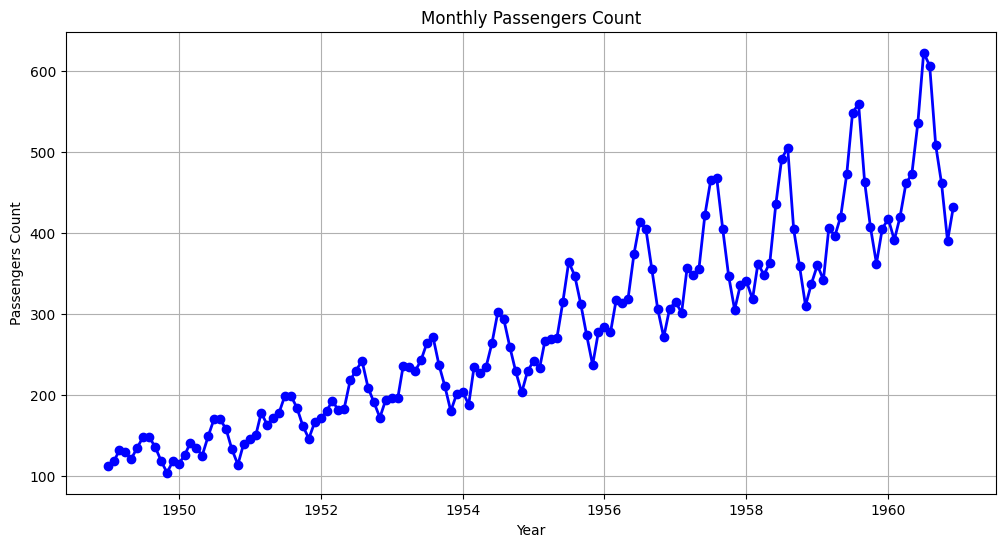

In [ ]:
# Creating a line plot
plt.figure(figsize=(12,6))
plt.plot(df, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Monthly Passengers Count')
plt.xlabel('Year')
plt.ylabel('Passengers Count')
plt.grid(True)
plt.show()

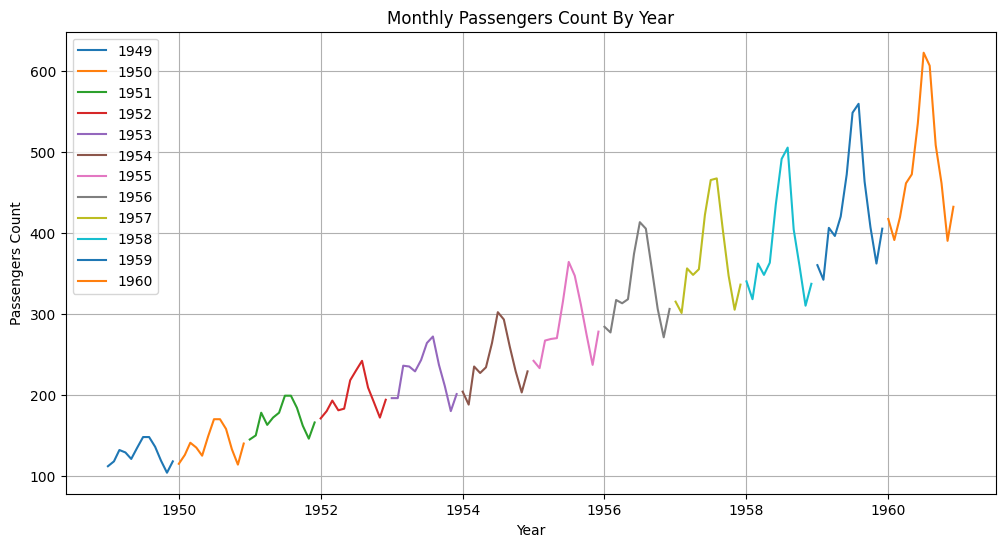

In [ ]:
# Extract years from data
years = df.index.year.unique()

# Plotting each year as its own line
plt.figure(figsize=(12,6))
for year in years:
  year_data = df[df.index.year == year]
  plt.plot(year_data['Passengers'], label=year)

plt.title('Monthly Passengers Count By Year')
plt.xlabel('Year')
plt.ylabel('Passengers Count')
plt.legend()
plt.grid(True)
plt.show()

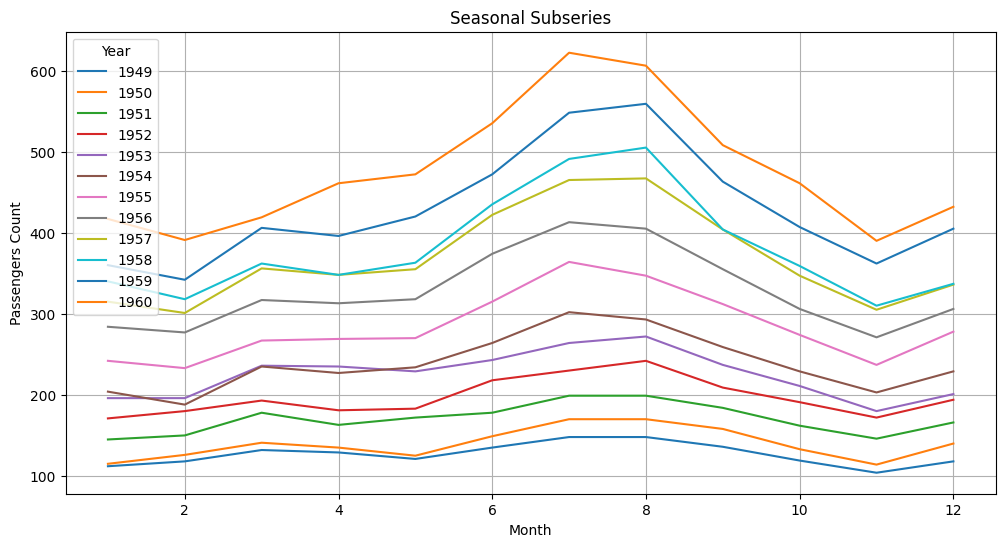

In [ ]:
# Plot seasonal subseries
df['Year'] = df.index.year
df['month'] = df.index.month

# Pivot table
table = pd.pivot_table(df,
                       values='Passengers',
                       index=['month'],
                       columns='Year',
                       aggfunc='sum')

# Plot the series
fig, ax = plt.subplots(figsize=(12,6))
table.plot(ax=ax, kind='line', legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Passengers Count')
ax.set_title('Seasonal Subseries')
plt.grid(True)
plt.show()

/tmp/ipython-input-2348247343.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Passengers'], shade=True)


Text(0, 0.5, 'Density')

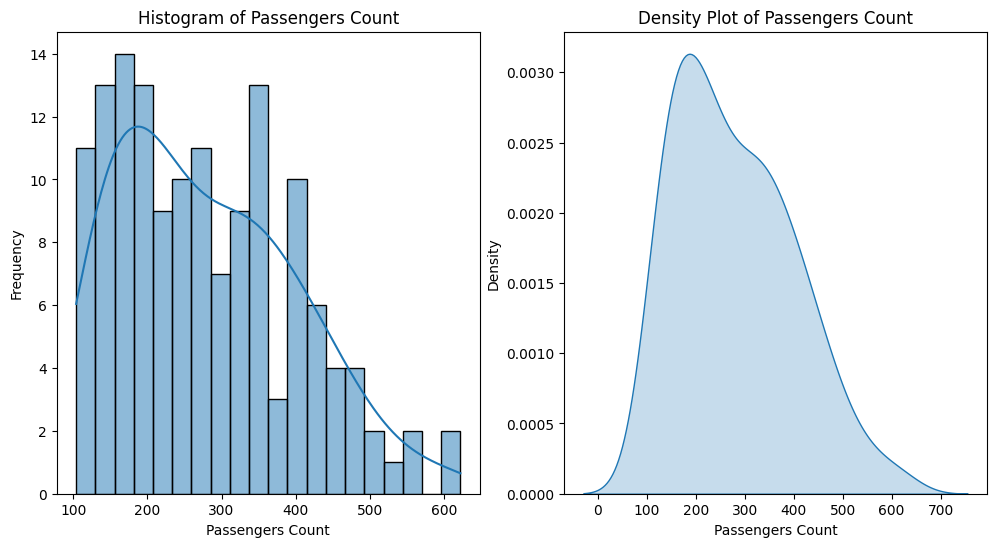

In [ ]:
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Passengers'], bins=20, kde=True)
plt.title('Histogram of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Frequency')

# Densidad
plt.subplot(1, 2, 2)
sns.kdeplot(df['Passengers'], shade=True)
plt.title('Density Plot of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Density')

Exercise 1.

Use the Sunspots dataset (https://www.kaggle.com/datasets/robervalt/sunspots) to demonstrate basic concepts of time series

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df_sn = pd.read_csv('/content/drive/MyDrive/Colab 7 Semestre/Jesus/2° Bloque/Sunspots.csv')

# Set date as the index
df_sn['Date'] = pd.to_datetime(df_sn['Date'])
df_sn.set_index('Date', inplace=True)

# Rename column
df_sn.rename(columns={'Monthly Mean Total Sunspot Number': 'Sunspots'}, inplace=True)

df_sn.head(20)

,Unnamed: 0,Sunspots
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7
1749-06-30,5,139.2
1749-07-31,6,158.0
1749-08-31,7,110.5
1749-09-30,8,126.5


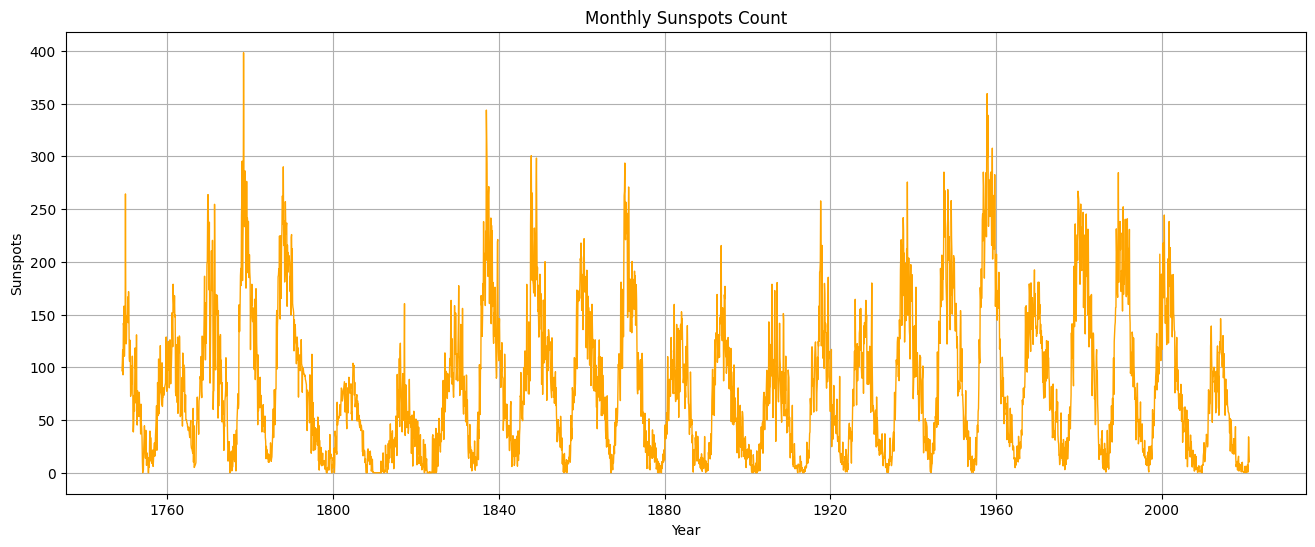

In [ ]:
# Creating a line plot
plt.figure(figsize=(16,6))
plt.plot(df_sn['Sunspots'], color='orange', linewidth=1)
plt.title('Monthly Sunspots Count')
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.grid(True)
plt.show()

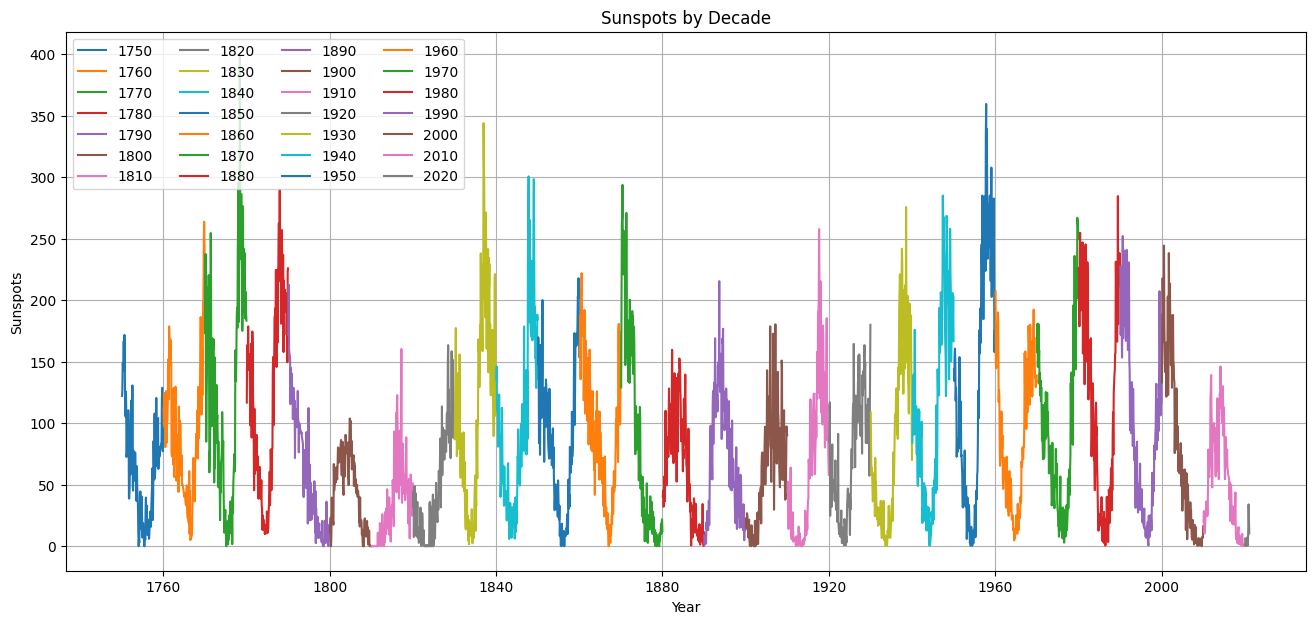

In [ ]:
years = df_sn.index.year.unique()
decades = [y for y in years if y % 10 == 0]  # separated by decades (the graph becomes saturated when separated by years)

plt.figure(figsize=(16,7))

for d in decades:
    decade_data = df_sn[df_sn.index.year // 10 * 10 == d]
    plt.plot(decade_data.index, decade_data['Sunspots'], label=str(d))

plt.title("Sunspots by Decade")
plt.xlabel("Year")
plt.ylabel("Sunspots")
plt.legend(ncol=4)
plt.grid(True)
plt.show()


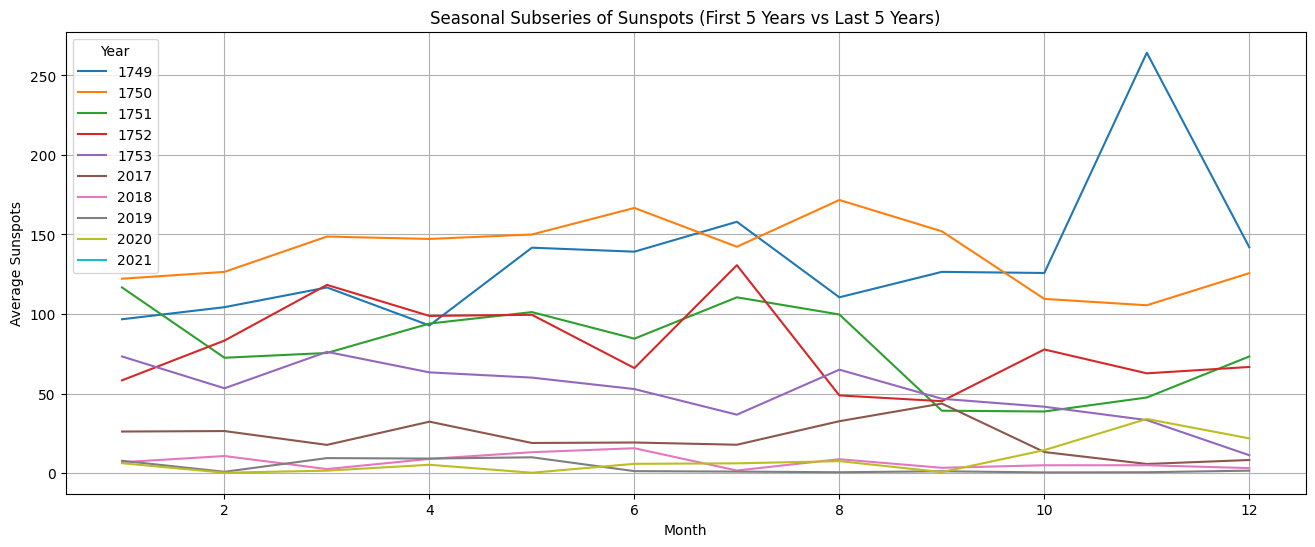

In [ ]:
# Plot seasonal subseries
df_sn['Year'] = df_sn.index.year
df_sn['Month'] = df_sn.index.month

# First 5 and last 5 years of the dataset
years_sorted = sorted(df_sn['Year'].unique())

first_5_years = years_sorted[:5]
last_5_years = years_sorted[-5:]

# Filter only those 10 years
df_filtered = df_sn[df_sn['Year'].isin(first_5_years + last_5_years)]

# Pivot table
table_filtered = pd.pivot_table(df_filtered,
                                values='Sunspots',
                                index='Month',
                                columns='Year',
                                aggfunc='mean')

# Plot the series
fig, ax = plt.subplots(figsize=(16, 6))
table_filtered.plot(ax=ax, kind='line', legend=True)

ax.set_xlabel('Month')
ax.set_ylabel('Average Sunspots')
ax.set_title('Seasonal Subseries of Sunspots (First 5 Years vs Last 5 Years)')
plt.grid(True)
plt.show()


/tmp/ipython-input-664331604.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_sn['Sunspots'], shade=True, color='orange')


Text(0, 0.5, 'Density')

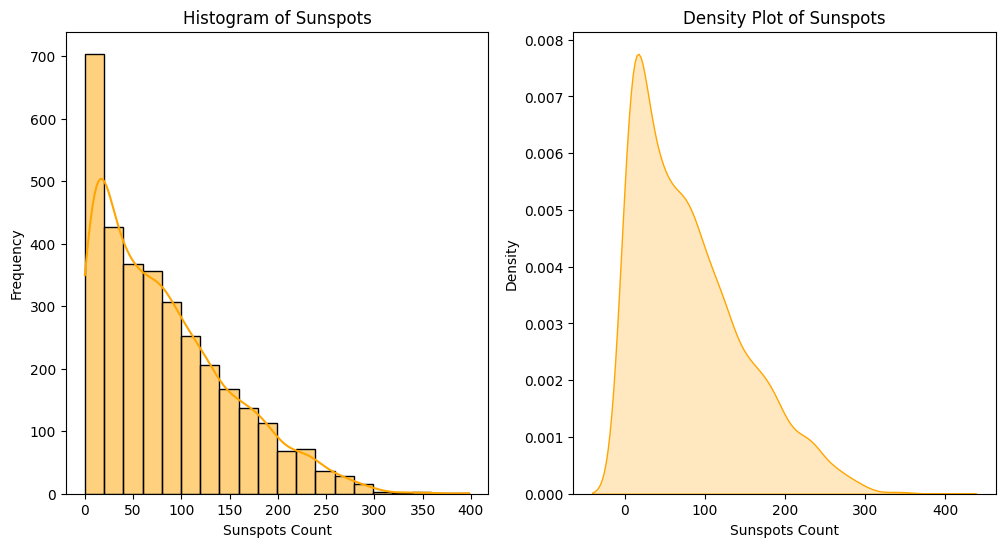

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_sn['Sunspots'], bins=20, kde=True, color='orange')
plt.title('Histogram of Sunspots')
plt.xlabel('Sunspots Count')
plt.ylabel('Frequency')

# Density
plt.subplot(1, 2, 2)
sns.kdeplot(df_sn['Sunspots'], shade=True, color='orange')
plt.title('Density Plot of Sunspots')
plt.xlabel('Sunspots Count')
plt.ylabel('Density')

Exercise 2.

Use the Unemployment in America dataset(https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state)

In [ ]:
# Load dataset
df_national = pd.read_csv('/content/drive/MyDrive/Colab 7 Semestre/Jesus/2° Bloque/Unemployment in America Per US State.csv')

df_national.head(20)

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2
5,37,Los Angeles County,1976,1,"5,273,000","3,381,856",64.1,"3,081,806",58.4,"300,050",8.9
6,8,Colorado,1976,1,"1,832,000","1,230,966",67.2,"1,160,104",63.3,"70,862",5.8
7,9,Connecticut,1976,1,"2,248,000","1,442,847",64.2,"1,301,974",57.9,"140,873",9.8
8,10,Delaware,1976,1,"417,000","261,418",62.7,"240,543",57.7,"20,875",8.0
9,11,District of Columbia,1976,1,"520,000","334,691",64.4,"305,677",58.8,"29,014",8.7


In [ ]:
# Create the national unemployment rate (state average)
df_national = df_national.groupby(['Year','Month'])['Percent (%) of Labor Force Unemployed in State/Area'].mean().reset_index()

# Create date column and set as the index
df_national['Date'] = pd.to_datetime(dict(year=df_national['Year'], month=df_national['Month'], day=1))
df_national.set_index('Date', inplace=True)


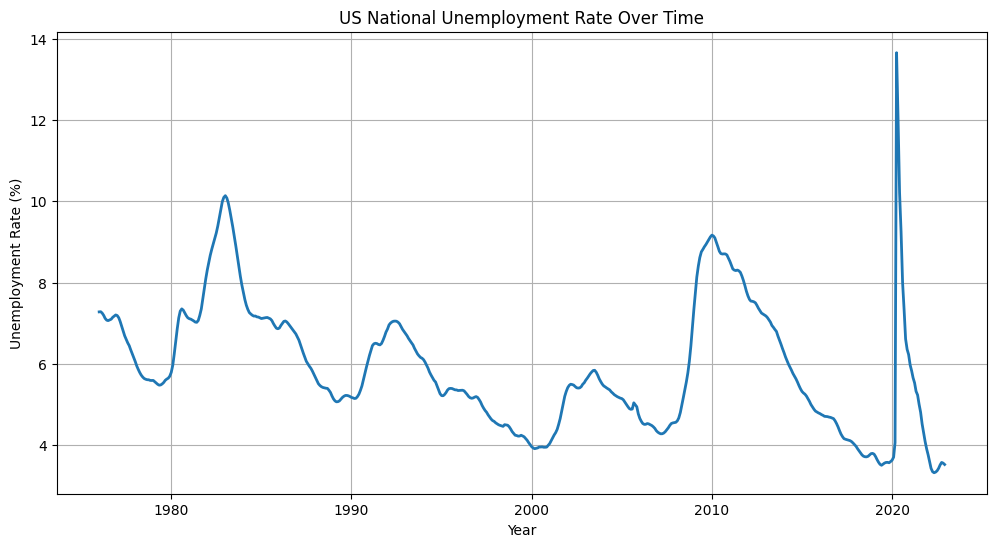

In [ ]:
# Create a line plot
plt.figure(figsize=(12,6))
plt.plot(df_national['Percent (%) of Labor Force Unemployed in State/Area'], linewidth=2)
plt.title('US National Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


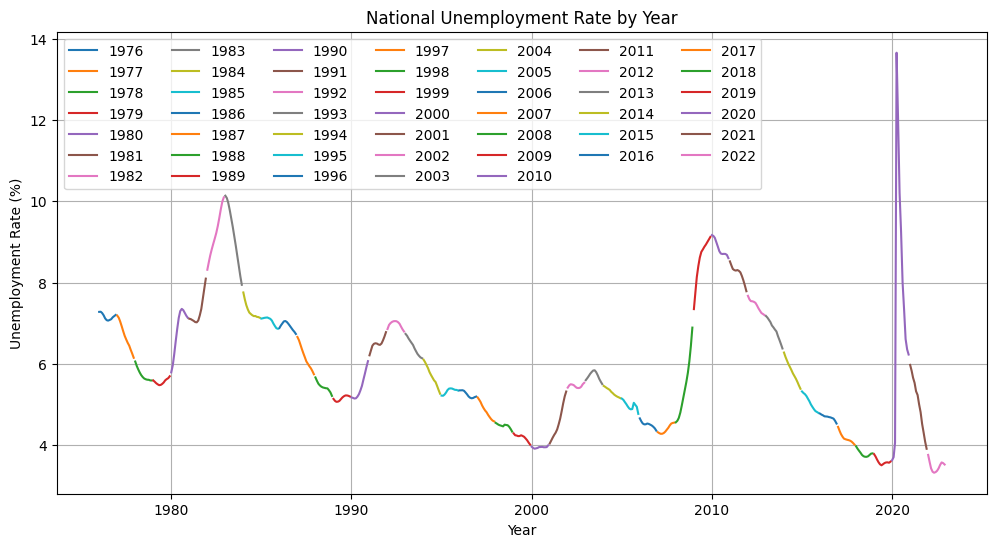

In [ ]:
# Extract years from data
years = df_national.index.year.unique()

# Plotting each year as its own line
plt.figure(figsize=(12,6))
for year in years:
    year_data = df_national[df_national.index.year == year]
    plt.plot(year_data['Percent (%) of Labor Force Unemployed in State/Area'], label=year)

plt.title('National Unemployment Rate by Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.legend(ncol=7)
plt.grid(True)
plt.show()



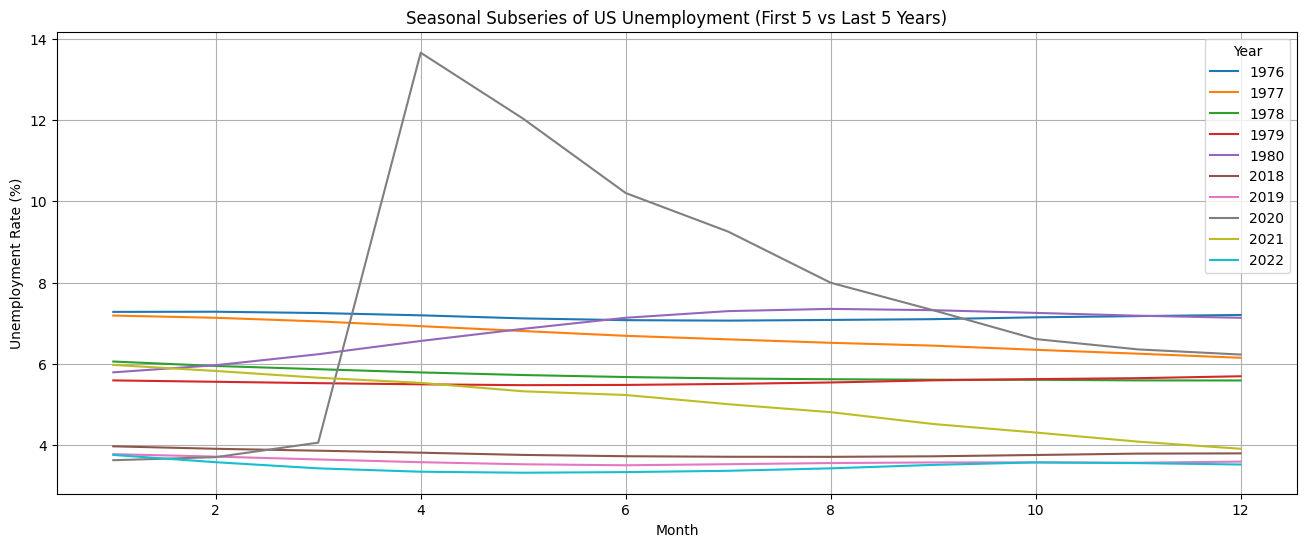

In [ ]:
# Plot seasonal subseries
df_national['Year'] = df_national.index.year
df_national['Month'] = df_national.index.month

# First 5 and last 5 years of the dataset
years_sorted = sorted(df_national['Year'].unique())
first_5_years = years_sorted[:5]
last_5_years = years_sorted[-5:]

# Filter only those 10 years
df_filtered = df_national[df_national['Year'].isin(first_5_years + last_5_years)]

# Pivot table
table_filtered = pd.pivot_table(df_filtered,
                                values='Percent (%) of Labor Force Unemployed in State/Area',
                                index='Month',
                                columns='Year',
                                aggfunc='mean')

# Plot the series
fig, ax = plt.subplots(figsize=(16, 6))
table_filtered.plot(ax=ax, kind='line', legend=True)

ax.set_xlabel('Month')
ax.set_ylabel('Unemployment Rate (%)')
ax.set_title('Seasonal Subseries of US Unemployment (First 5 vs Last 5 Years)')
plt.grid(True)
plt.show()


/tmp/ipython-input-3598736086.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_national['Percent (%) of Labor Force Unemployed in State/Area'], shade=True)


Text(0, 0.5, 'Density')

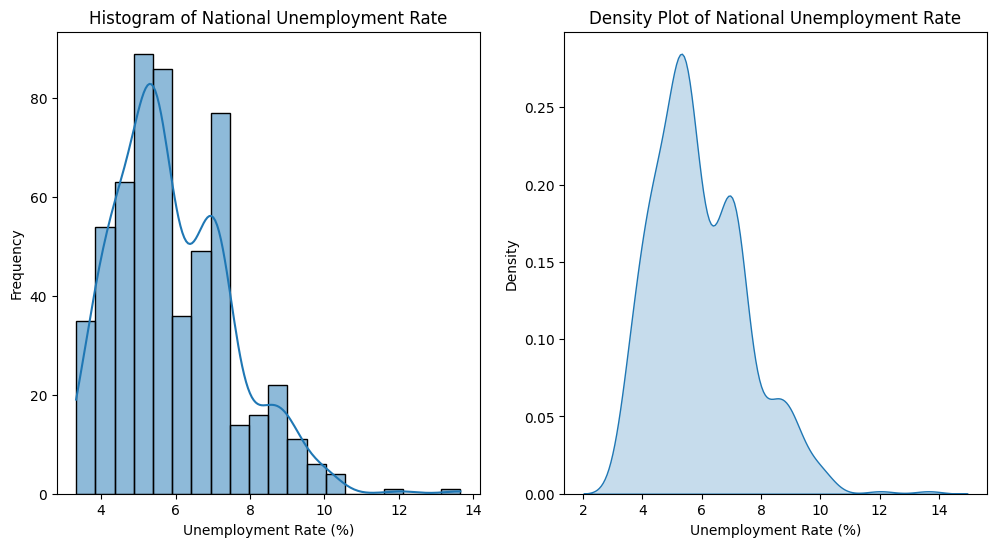

In [ ]:
plt.figure(figsize=(12,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df_national['Percent (%) of Labor Force Unemployed in State/Area'], bins=20, kde=True)
plt.title('Histogram of National Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')

# Densidad
plt.subplot(1,2,2)
sns.kdeplot(df_national['Percent (%) of Labor Force Unemployed in State/Area'], shade=True)
plt.title('Density Plot of National Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Density')

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
np.random.seed(42)
plt.rcParams['figure.figsize'] = (10,4)

In [ ]:
def plot_series(s, title):
  s.plot()
  plt.title(title)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)
  plt.show()

def adf_test(x):
  res = adfuller(x, autolag="AIC")
  keys = ['test_stat', 'pvalue', 'lags', 'nobs', 'crit_values', 'icbest']
  return dict(zip(keys,[res[0], res[1], res[3], res[4], res[5]]))

def kpss_test(x, regression='c', nlags="auto"):
  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)
  return {"test_stat": stat, "pvalue": pval, "lags": lags, "crit_values": crit, "regression": regression}

def print_test(x, name="series"):
  print(f"Test {name}")
  a = adf_test(x)
  print(f"ADF Statistic: {a['test_stat']:.3f} p={a['pvalue']}")
  try:
    k = kpss_test(x)
    print(f"KPSS: stat={k['test_stat']:.3f} p={k['pvalue']}")
  except:
    print("KPSS test failed")

def rolling_mean_var(s, window=24, title="Rolling Mean & Var"):
  rolling_mean = s.rolling(window).mean()
  rolling_var = s.rolling(window).var()
  fig, ax = plt.subplots(2, 1, figsize=(10, 6))
  ax[0].plot(s, label="Original")
  ax[0].plot(rolling_mean, label="Rolling Mean")
  ax[0].legend()
  ax[0].set_title(title + "- Mean")
  ax[1].plot(rolling_var, label="Rolling Var")
  ax[1].legend()
  ax[1].set_title(title + "- Var")
  plt.show()


In [ ]:
n = 240  # months
t =  np.arange(n)

# Stationary: white noise
white_noise = pd.Series(np.random.normal(0, 1, n))

trend = 0.02 * t
trended = pd.Series(trend + np.random.normal(0, 1, n))


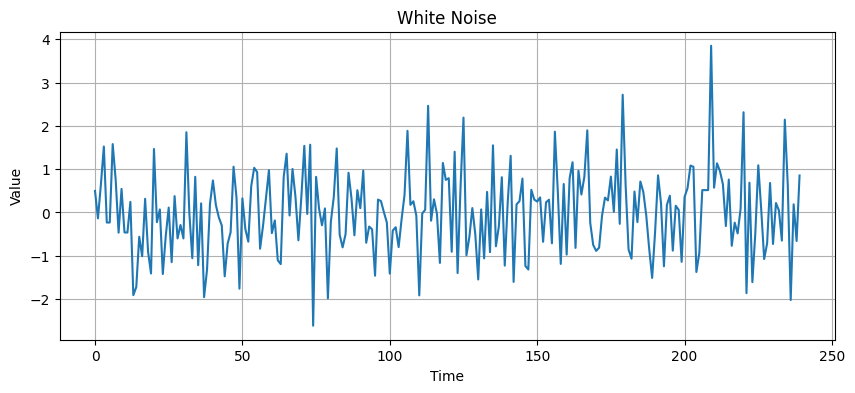

Test White Noise
ADF Statistic: -16.112 p=5.006520467194035e-29
KPSS: stat=0.298 p=0.1


/tmp/ipython-input-2105317183.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


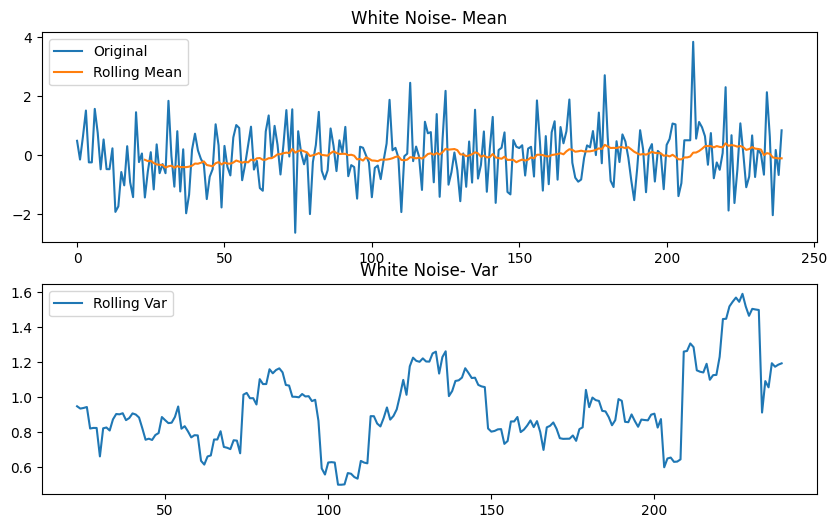

In [ ]:
plot_series(white_noise, "White Noise")
print_test(white_noise, "White Noise")
rolling_mean_var(white_noise, window=24, title="White Noise")

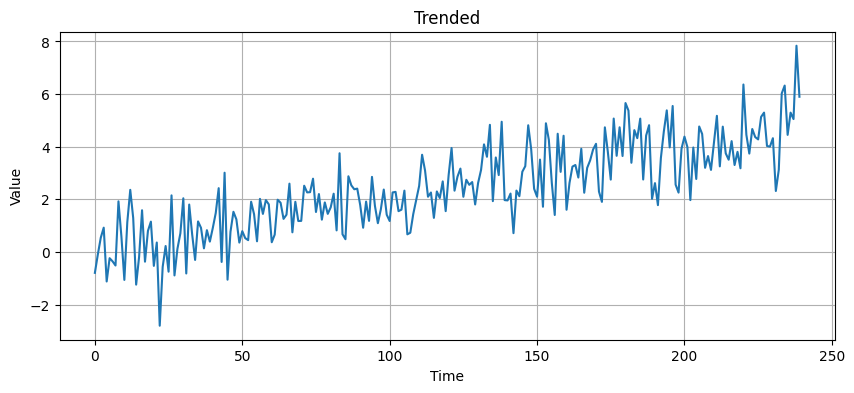

Test Trended
ADF Statistic: -0.057 p=0.9535945013089667
KPSS: stat=2.416 p=0.01


/tmp/ipython-input-2105317183.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


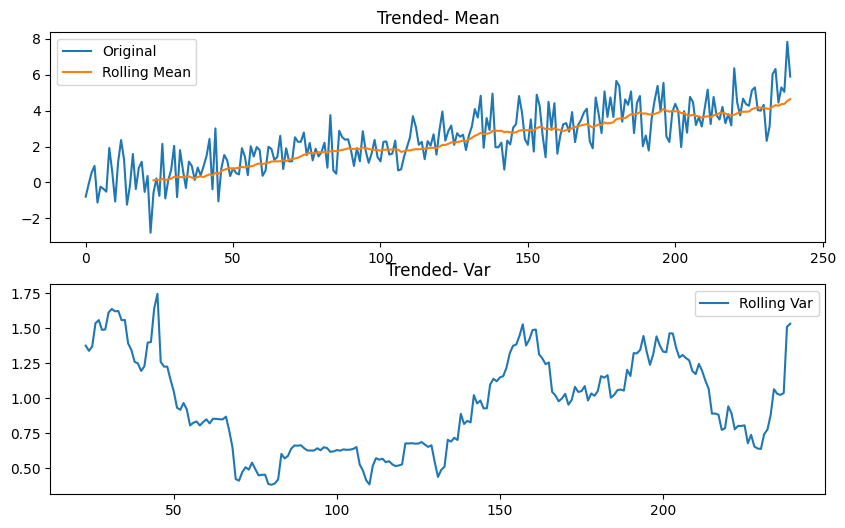

In [ ]:
plot_series(trended, "Trended")
print_test(trended, "Trended")
rolling_mean_var(trended, window=24, title="Trended")


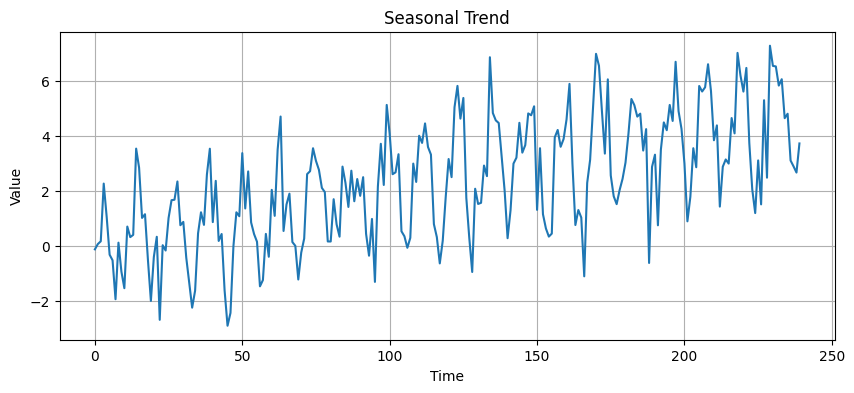

Test Seasonal Trend
ADF Statistic: -0.530 p=0.8860859361543622
KPSS: stat=2.407 p=0.01


/tmp/ipython-input-2105317183.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


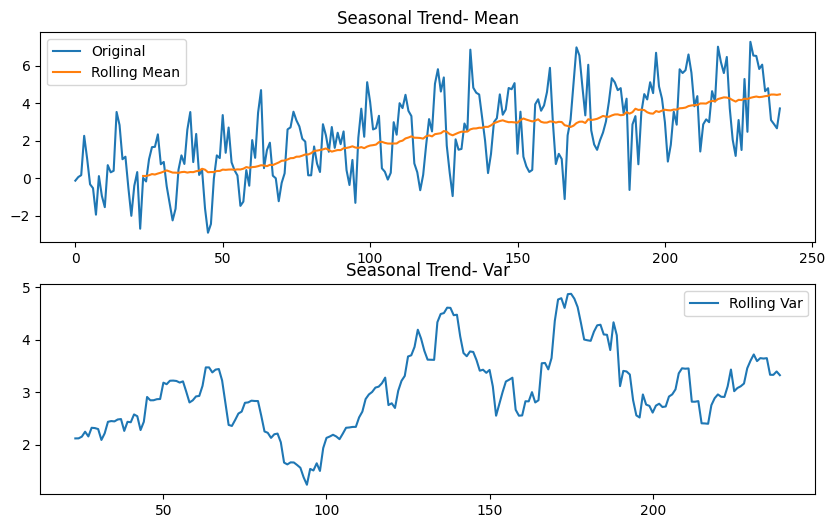

In [ ]:
# Seasonal + trend
seasonal = 2 * np.sin(2 * np.pi * t/12)
trend = 0.02 * t
season_trend = pd.Series(trend +  seasonal + np.random.normal(0, 1, n))
plot_series(season_trend, "Seasonal Trend")
print_test(season_trend, "Seasonal Trend")
rolling_mean_var(season_trend, window=24, title="Seasonal Trend")

In [ ]:
df.rename(columns={'Passengers':'y'}, inplace=True)
df.head()

,y,Year,month
Month,,,
1949-01-01,112,1949,1
1949-02-01,118,1949,2
1949-03-01,132,1949,3
1949-04-01,129,1949,4
1949-05-01,121,1949,5


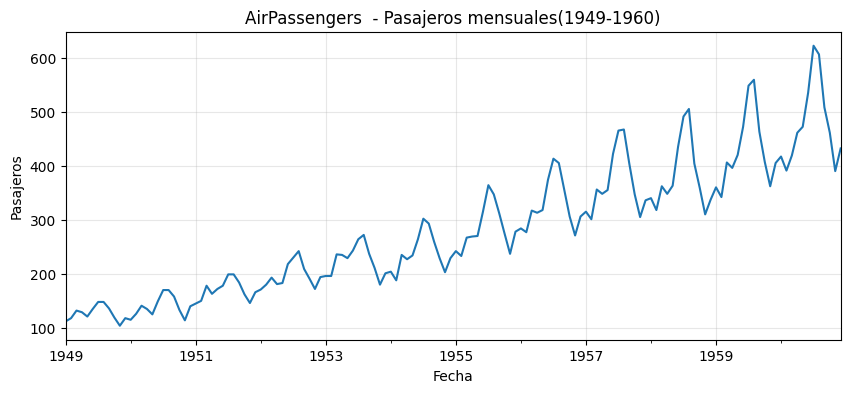

In [ ]:
ax = df['y'].plot()
ax.set_title("AirPassengers  - Pasajeros mensuales(1949-1960)")
ax.set_xlabel("Fecha")
ax.set_ylabel("Pasajeros")
ax.grid(True, alpha=0.3)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

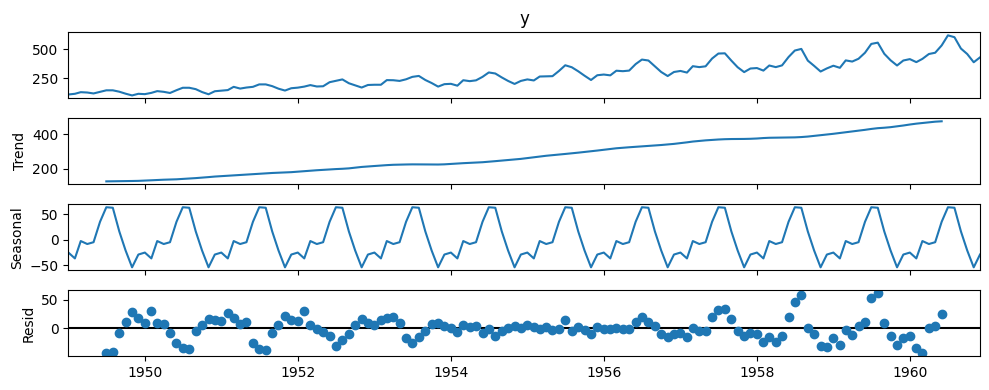

In [ ]:
decomp = seasonal_decompose(df['y'], model="additive", period=12)
decomp.plot()
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit an AR(1) model
model = AutoReg(df['y'], lags=1)
model_fit  =model.fit()



# Print the model summary
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  144
Model:                     AutoReg(1)   Log Likelihood                -704.106
Method:               Conditional MLE   S.D. of innovations             33.277
Date:                Sun, 23 Nov 2025   AIC                           1414.212
Time:                        06:29:32   BIC                           1423.100
Sample:                    02-01-1949   HQIC                          1417.823
                         - 12-01-1960                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7055      7.084      1.935      0.053      -0.178      27.589
y.L1           0.9589      0.023     41.106      0.000       0.913       1.005
                                    Roots           

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


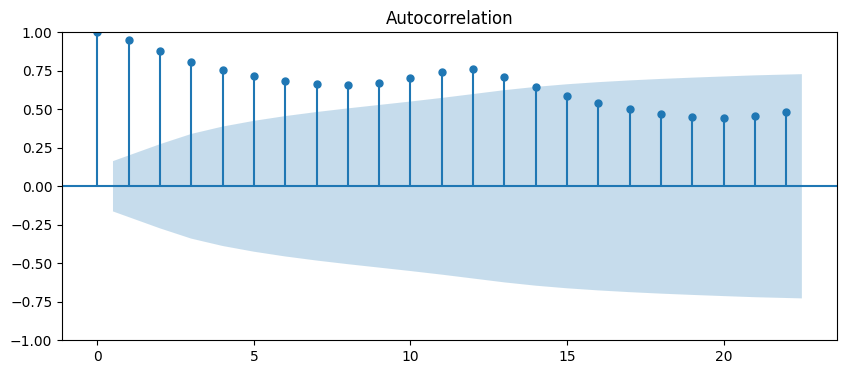

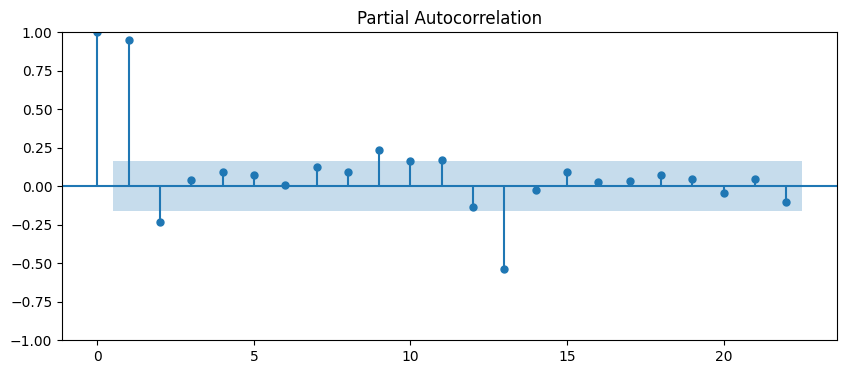

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df['y'])
plt.show()
plot_pacf(df['y'])
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(1) model
model = ARIMA(df['y'], order=(0, 0, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -806.431
Date:                Sun, 23 Nov 2025   AIC                           1618.863
Time:                        06:29:38   BIC                           1627.772
Sample:                    01-01-1949   HQIC                          1622.483
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.6500     11.649     24.092      0.000     257.818     303.482
ma.L1          0.9642      0.030     32.239      0.000       0.906       1.023
sigma2      4205.2148    586.727      7.167      0.0

In [ ]:
# Fit an ARIMA (1, 1, 1)
model = ARIMA(df['y'], order=(1, 1, 1))
model_fit = model.fit()

# Print the model summmary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Sun, 23 Nov 2025   AIC                           1394.683
Time:                        06:29:41   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


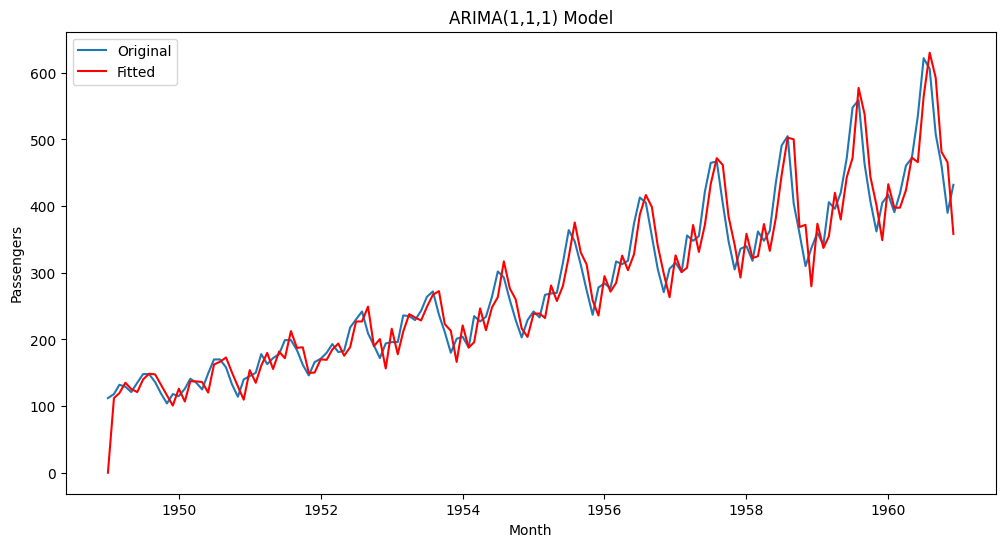

In [ ]:
# plot the fitted values
plt.figure(figsize=(12, 6))
plt.plot(df['y'], label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted')
plt.title('ARIMA(1,1,1) Model')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()